In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# infected to death
See https://www.imperial.ac.uk/media/imperial-college/medicine/mrc-gida/2020-03-30-COVID19-Report-13.pdf We have, mean and cov $Gamma(5.1, 0.86)$ (incubation period) and $Gamma(18.8, 0.45)$ (onset-to-death).

In [2]:
def gamma_mu_cov_to_shape_scale(mu, cov):
    shape = 1/(cov**2)
    scale = mu * (cov**2)
    return shape, scale

Binned As [-1.   0.   1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5
 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5]
Expectation: 22.867891187758683
True Mean: 22.89951953598834
Delay Prob: [0.00000000e+00 2.24600347e-06 3.90382088e-05 2.34307085e-04
 7.83555003e-04 1.91221622e-03 3.78718437e-03 6.45923913e-03
 9.94265709e-03 1.40610714e-02 1.86527920e-02 2.34311421e-02
 2.81965055e-02 3.27668001e-02 3.68031574e-02 4.03026198e-02
 4.30521951e-02 4.50637136e-02 4.63315047e-02 4.68794406e-02
 4.67334059e-02 4.59561441e-02 4.47164503e-02 4.29327455e-02
 4.08614522e-02 3.85082076e-02 3.60294203e-02 3.34601703e-02
 3.08064505e-02 2.81766028e-02 2.56165924e-02 2.31354369e-02
 2.07837267e-02 1.86074383e-02 1.65505661e-02 1.46527043e-02
 1.29409383e-02 1.13695920e-02 9.9323

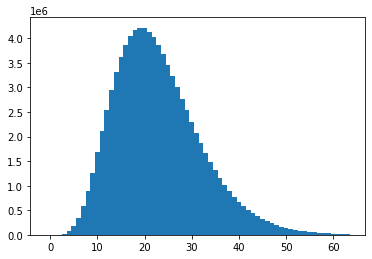

In [3]:
nRVs= int(9e7)
shp1, scl1 = gamma_mu_cov_to_shape_scale(5.1, 0.86)
shp2, scl2 = gamma_mu_cov_to_shape_scale(17.8, 0.45)
samples = np.random.gamma(shape=shp1, scale=scl1, size=nRVs) + np.random.gamma(shape=shp2, scale=scl2, size=nRVs)
bins = np.arange(-1, 64.0)
bins[2:] += 0.5
print(f"Binned As {bins}")

n, _, _ = plt.hist(samples, bins);
delay_prob = n / np.sum(n)
print(f"Expectation: {np.sum([(i) * delay_prob[i] for i in range(64)])}")
print(f"True Mean: {np.mean(samples)}")
print(f"Delay Prob: {delay_prob}")

In [4]:
delay_prob

array([0.00000000e+00, 2.24600347e-06, 3.90382088e-05, 2.34307085e-04,
       7.83555003e-04, 1.91221622e-03, 3.78718437e-03, 6.45923913e-03,
       9.94265709e-03, 1.40610714e-02, 1.86527920e-02, 2.34311421e-02,
       2.81965055e-02, 3.27668001e-02, 3.68031574e-02, 4.03026198e-02,
       4.30521951e-02, 4.50637136e-02, 4.63315047e-02, 4.68794406e-02,
       4.67334059e-02, 4.59561441e-02, 4.47164503e-02, 4.29327455e-02,
       4.08614522e-02, 3.85082076e-02, 3.60294203e-02, 3.34601703e-02,
       3.08064505e-02, 2.81766028e-02, 2.56165924e-02, 2.31354369e-02,
       2.07837267e-02, 1.86074383e-02, 1.65505661e-02, 1.46527043e-02,
       1.29409383e-02, 1.13695920e-02, 9.93233881e-03, 8.66063386e-03,
       7.53805464e-03, 6.51560047e-03, 5.63512264e-03, 4.84296166e-03,
       4.14793478e-03, 3.56267297e-03, 3.03480656e-03, 2.59406730e-03,
       2.19519042e-03, 1.85454286e-03, 1.58333238e-03, 1.33002321e-03,
       1.11716435e-03, 9.35360376e-04, 7.87780158e-04, 6.58601602e-04,
      

# infected to confirmed
See https://www.imperial.ac.uk/media/imperial-college/medicine/mrc-gida/2020-03-30-COVID19-Report-13.pdf We have, mean and cov $Gamma(5.1, 0.86)$ (incubation period). 

Then, the symptoms to confirmation period, see https://arxiv.org/ftp/arxiv/papers/2003/2003.09320.pdf. 

"Negative binomial distribution to the data. We found that the best-fitting distribution has mean 5.25 and dispersion 1.57"

for the NB, the dispersion is exactly n (or r on wikipedia). We can then solve for p, but the numpy version seems to use 1-p.

Binned As [-0.1  0.9  1.9  2.9  3.9  4.9  5.9  6.9  7.9  8.9  9.9 10.9 11.9 12.9
 13.9 14.9 15.9 16.9 17.9 18.9 19.9 20.9 21.9 22.9 23.9 24.9 25.9 26.9
 27.9 28.9 29.9 30.9 31.9 32.9 33.9 34.9 35.9 36.9 37.9 38.9 39.9 40.9
 41.9 42.9 43.9 44.9 45.9 46.9 47.9 48.9 49.9 50.9 51.9 52.9 53.9 54.9
 55.9 56.9 57.9 58.9 59.9 60.9 61.9 62.9 63.9]
Expectation: 5.250058900010471
True Mean: 5.250069844444444
Delay Prob: [9.96264510e-02 1.20441299e-01 1.19165843e-01 1.09156042e-01
 9.59400615e-02 8.23502480e-02 6.94032012e-02 5.77684769e-02
 4.76384529e-02 3.89844292e-02 3.17187501e-02 2.56726601e-02
 2.07234370e-02 1.66698030e-02 1.33363246e-02 1.06390686e-02
 8.51633485e-03 6.75893453e-03 5.36412318e-03 4.24502298e-03
 3.36853393e-03 2.66613381e-03 2.09295593e-03 1.65972252e-03
 1.31214468e-03 1.02751129e-03 8.09000144e-04 6.34500113e-04
 4.98944533e-04 3.95455626e-04 3.09777833e-04 2.40877821e-04
 1.87233367e-04 1.47355582e-04 1.16288910e-04 9.06444606e-05
 7.20333461e-05 5.38444540e-05 4.40000

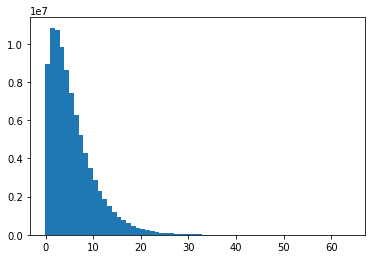

In [2]:
nRVs= int(9e7)
samples =  np.random.negative_binomial(1.57, (1-0.7698),size=nRVs)
bins = np.arange(0, 65.0)
bins -= 0.1
print(f"Binned As {bins}")

n, _, _ = plt.hist(samples, bins);
delay_prob = n / np.sum(n)
print(f"Expectation: {np.sum([(i) * delay_prob[i] for i in range(64)])}")
print(f"True Mean: {np.mean(samples)}")
print(f"Delay Prob: {delay_prob}")

The above histogram well matches the estimate from the paper, so our conversion formula looks correct. 

We use the sum of these distributions. 

In [3]:
print(f"Expectation: {np.sum([(i**2) * delay_prob[i] for i in range(64)])}")

Expectation: 50.36383160912562


Binned As [-1.   0.   1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5]
Expectation: 10.13292134433993
True Mean: 10.34964783942911
Delay Prob: [0.         0.0252817  0.03717965 0.05181224 0.06274125 0.06961334
 0.07277174 0.07292397 0.07077184 0.06694868 0.06209945 0.05659917
 0.0508999  0.0452042  0.03976573 0.03470891 0.0299895  0.02577721
 0.02199923 0.01871723 0.01577148 0.01326564 0.01110783 0.00928827
 0.0077231  0.00641162 0.00530572 0.00437895 0.00358801 0.00295791
 0.0024217  0.00197484]


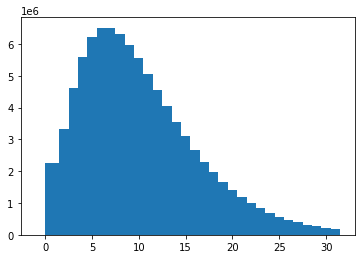

In [21]:
nRVs= int(9e7)
shp1, scl1 = gamma_mu_cov_to_shape_scale(5.1, 0.86)
samples = np.random.gamma(shape=shp1, scale=scl1, size=nRVs) + np.random.negative_binomial(1.57, (1-0.7698), size=nRVs)
bins = np.arange(-1, 32.0)
bins[2:] += 0.5
print(f"Binned As {bins}")

n, _, _ = plt.hist(samples, bins);
delay_prob = n / np.sum(n)
print(f"Expectation: {np.sum([(i) * delay_prob[i] for i in range(32)])}")
print(f"True Mean: {np.mean(samples)}")
print(f"Delay Prob: {delay_prob}")

In [22]:
delay_prob

array([0.        , 0.0252817 , 0.03717965, 0.05181224, 0.06274125,
       0.06961334, 0.07277174, 0.07292397, 0.07077184, 0.06694868,
       0.06209945, 0.05659917, 0.0508999 , 0.0452042 , 0.03976573,
       0.03470891, 0.0299895 , 0.02577721, 0.02199923, 0.01871723,
       0.01577148, 0.01326564, 0.01110783, 0.00928827, 0.0077231 ,
       0.00641162, 0.00530572, 0.00437895, 0.00358801, 0.00295791,
       0.0024217 , 0.00197484])

In [9]:
# shorter

Binned As [-1.   0.   1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5]
Expectation: 8.3057848349173
SD: 5.185255711466038
True Mean: 8.350923268452327
Delay Prob: [0.         0.04086903 0.05623389 0.07404812 0.08464692 0.08861931
 0.08750149 0.08273123 0.07575679 0.06766597 0.05910415 0.05093048
 0.04321916 0.03622008 0.03000523 0.02472037 0.02016809 0.01637281
 0.01318903 0.01057912 0.00844349 0.0067064  0.00529629 0.00416558
 0.00327265 0.00255511 0.00200011 0.00155583 0.00120648 0.00093964
 0.00072111 0.00055606]


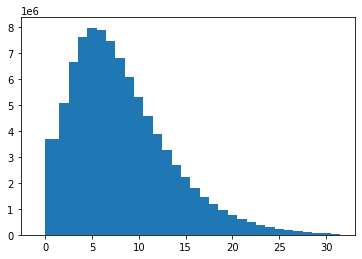

In [53]:
m = 5.25-1
r = 1.57
p = m / (m + r)


nRVs= int(9e7)
shp1, scl1 = gamma_mu_cov_to_shape_scale(5.1-1, 0.86)
samples = np.random.gamma(shape=shp1, scale=scl1, size=nRVs) + np.random.negative_binomial(r,1-p, size=nRVs)
bins = np.arange(-1, 32.0)
bins[2:] += 0.5
print(f"Binned As {bins}")

n, _, _ = plt.hist(samples, bins);
delay_prob = n / np.sum(n)
ex = np.sum([(i) * delay_prob[i] for i in range(32)])
ex2 = np.sum([(i)**2 * delay_prob[i] for i in range(32)])
print(f"Expectation: {ex}")
print(f"SD: {np.sqrt(ex2 - ex**2)}")
print(f"True Mean: {np.mean(samples)}")
print(f"Delay Prob: {delay_prob}")
delay_prob_short = delay_prob

Binned As [-1.   0.   1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5]
Expectation: 11.759742361103644
SD: 6.660722379000485
True Mean: 12.350197949695973
Delay Prob: [0.         0.01690821 0.02602795 0.03772294 0.0474657  0.05484009
 0.05969648 0.06231737 0.06292536 0.0619761  0.05983904 0.05677383
 0.05311211 0.04914501 0.04502909 0.04085248 0.03682251 0.03290895
 0.02924259 0.02585378 0.02274018 0.01993739 0.01739687 0.01511531
 0.01309569 0.01130081 0.00972391 0.00832998 0.00716289 0.00610338
 0.00520349 0.00443053]


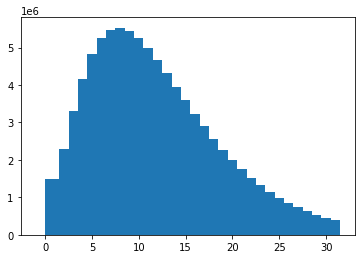

In [52]:
m = 5.25+1
r = 1.57
p = m / (m + r)


nRVs= int(9e7)
shp1, scl1 = gamma_mu_cov_to_shape_scale(5.1+1, 0.86)
samples = np.random.gamma(shape=shp1, scale=scl1, size=nRVs) + np.random.negative_binomial(r,1-p, size=nRVs)
bins = np.arange(-1, 32.0)
bins[2:] += 0.5
print(f"Binned As {bins}")

n, _, _ = plt.hist(samples, bins);
delay_prob = n / np.sum(n)
ex = np.sum([(i) * delay_prob[i] for i in range(32)])
ex2 = np.sum([(i)**2 * delay_prob[i] for i in range(32)])
print(f"Expectation: {ex}")
print(f"SD: {np.sqrt(ex2 - ex**2)}")
print(f"True Mean: {np.mean(samples)}")
print(f"Delay Prob: {delay_prob}")
delay_prob_long = delay_prob

In [110]:
delay_prob_long

array([0.        , 0.01690821, 0.02602795, 0.03772294, 0.0474657 ,
       0.05484009, 0.05969648, 0.06231737, 0.06292536, 0.0619761 ,
       0.05983904, 0.05677383, 0.05311211, 0.04914501, 0.04502909,
       0.04085248, 0.03682251, 0.03290895, 0.02924259, 0.02585378,
       0.02274018, 0.01993739, 0.01739687, 0.01511531, 0.01309569,
       0.01130081, 0.00972391, 0.00832998, 0.00716289, 0.00610338,
       0.00520349, 0.00443053])

In [88]:
import theano
import theano.tensor as T
import theano.tensor.signal.conv as C
import theano.tensor.nnet.conv as C2

In [106]:
f = np.stack([delay_prob_short, delay_prob_long]).reshape((2, 1, 32))
d = np.array([[1, 2.0, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]).reshape((4, 3))

In [108]:
expected_deaths = C.conv2d(d, f, border_mode="full")

In [109]:
expected_deaths.eval()

array([[[0.        , 0.04086903, 0.13797195, 0.30912299, 0.40144483,
         0.48005751, 0.51868086, 0.52359213, 0.50372371, 0.46737324,
         0.42170647, 0.37213671, 0.32239258, 0.27544983, 0.23210286,
         0.19339107, 0.15962452, 0.13087011, 0.10643892, 0.08607561,
         0.06916881, 0.05533073, 0.04403956, 0.03487734, 0.02749266,
         0.02159713, 0.01692827, 0.01322139, 0.01031847, 0.0080201 ,
         0.00621983, 0.00481719, 0.00327544, 0.00166818],
        [0.        , 0.04086903, 0.13797195, 0.30912299, 0.40144483,
         0.48005751, 0.51868086, 0.52359213, 0.50372371, 0.46737324,
         0.42170647, 0.37213671, 0.32239258, 0.27544983, 0.23210286,
         0.19339107, 0.15962452, 0.13087011, 0.10643892, 0.08607561,
         0.06916881, 0.05533073, 0.04403956, 0.03487734, 0.02749266,
         0.02159713, 0.01692827, 0.01322139, 0.01031847, 0.0080201 ,
         0.00621983, 0.00481719, 0.00327544, 0.00166818],
        [0.        , 0.04086903, 0.13797195, 0.30912299,

In [100]:
f = np.stack([delay_prob_short, delay_prob_short, delay_prob_long, delay_prob_long]).reshape((4, 1, 1, 32))
d = np.array([[1, 2.0, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]).reshape((4, 1, 1, 3))
ed2 = C2.conv2d(d, f, border_mode="full", unshared=True)

/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/theano/tensor/nnet/conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


TypeError: __init__() got an unexpected keyword argument 'unshared'

In [101]:
ed2.eval()

array([[[[0.        , 0.04086903, 0.13797195, 0.30912299, 0.40144483,
          0.48005751, 0.51868086, 0.52359213, 0.50372371, 0.46737324,
          0.42170647, 0.37213671, 0.32239258, 0.27544983, 0.23210286,
          0.19339107, 0.15962452, 0.13087011, 0.10643892, 0.08607561,
          0.06916881, 0.05533073, 0.04403956, 0.03487734, 0.02749266,
          0.02159713, 0.01692827, 0.01322139, 0.01031847, 0.0080201 ,
          0.00621983, 0.00481719, 0.00327544, 0.00166818]],

        [[0.        , 0.04086903, 0.13797195, 0.30912299, 0.40144483,
          0.48005751, 0.51868086, 0.52359213, 0.50372371, 0.46737324,
          0.42170647, 0.37213671, 0.32239258, 0.27544983, 0.23210286,
          0.19339107, 0.15962452, 0.13087011, 0.10643892, 0.08607561,
          0.06916881, 0.05533073, 0.04403956, 0.03487734, 0.02749266,
          0.02159713, 0.01692827, 0.01322139, 0.01031847, 0.0080201 ,
          0.00621983, 0.00481719, 0.00327544, 0.00166818]],

        [[0.        , 0.01690821, 0.05

In [79]:
expected_deaths.eval().shape

(4, 4, 1, 34)

In [86]:
f.shape

(4, 1, 32)

In [87]:
d.shape

(4, 1, 3)

In [111]:
delay_prob_short

array([0.        , 0.04086903, 0.05623389, 0.07404812, 0.08464692,
       0.08861931, 0.08750149, 0.08273123, 0.07575679, 0.06766597,
       0.05910415, 0.05093048, 0.04321916, 0.03622008, 0.03000523,
       0.02472037, 0.02016809, 0.01637281, 0.01318903, 0.01057912,
       0.00844349, 0.0067064 , 0.00529629, 0.00416558, 0.00327265,
       0.00255511, 0.00200011, 0.00155583, 0.00120648, 0.00093964,
       0.00072111, 0.00055606])